<a href="https://colab.research.google.com/github/gimquokka/ML/blob/master/Universial_Approximation_Therom(UAT)_by_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Universial Approximation Therom(UAT) by Neural Network👑**

## Procedure
1. Choose the function want to approximate and extract feature_set and labels from the function
2. Triaing Neural Network with them
3. Plot trained result with matplotlib
4. Compare two plot and being pleasured, astonished on Neural Network...🤘

# 1. Choose the function want to approximate and extract feature_set and labels from the function

In [0]:
import numpy as np
import matplotlib.pyplot as plt

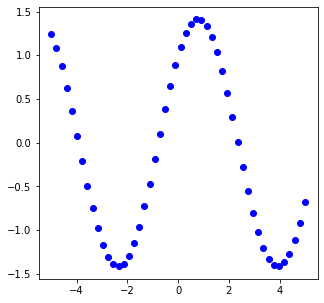

In [9]:
# The selected funciton!
def func(x):
  return np.sin(x) + np.cos(x) # <<<=== Adjust this function!

# Intialized parameters
sampling_num = 50

origin_x = np.linspace(5, -5, sampling_num)
origin_y = func(origin_x)

feature_set = origin_x.reshape(sampling_num, 1)
labels = origin_y.reshape(sampling_num, 1)

# Check the initialize result
'''
print('feature_set \n', feature_set)
print('feature_set.shape \n', feature_set.shape)

print('labels \n', labels)
print('labels.shape \n', labels.shape)
'''

# Plot
plt.figure(figsize=(5,5))
plt.scatter(feature_set, labels, c = 'blue')


# 2. Triaing Neural Network with them


In [0]:
# Define sigmoid and It's derivate
def sigmoid(x):
  return np.array(1/(1 + np.exp(-x)), dtype = np.float128)

def sigmoid_der(x):
  return np.array(sigmoid(x)*(1-sigmoid(x)), dtype =np.float128)

MSE:  11957.395297702745319
MSE:  2.1208409040446274786
MSE:  1.1688407914825433197
MSE:  0.61616536596582023556
MSE:  0.39983806133284671507
MSE:  0.29737586899396075492
MSE:  0.23181102299511302728
MSE:  0.18521745654535744196
MSE:  0.15072083118681758385
MSE:  0.124326230220885617195


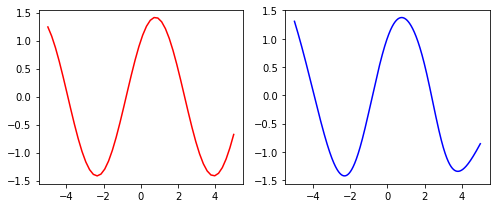

In [11]:
# =================== Initialize parameters ========================

# feature_set.shape = sampling_num x 1
# labels.shape = sampling_num x 1

# Number of hidden layer
numh1 = 50

# weight (1) Input to hidden_layer, (2) Hidden_layer to output
np.random.seed(40)
wh1 = np.random.rand(1, numh1) #wh1.shape = 1 x numh1
wo = np.random.rand(numh1, 1) #wo.shape = numh1 x 1
# print(wh1)

# Bias (1) of hidden layer (2) of output
bh1 = np.random.rand(numh1)
bo = np.random.rand(1)

Learning_rate = 0.001
training_num = 100000

# =================== Trianing ======================
for current_num in range(training_num):
  # Feedforward Propagation ===========================
  # Step 1
  zh1 = np.dot(feature_set, wh1) + bh1# dot product => (sampling_num x 1) x (1 x numh1)
  ah1 = sigmoid(zh1) # ah1.shape = sampling_num x numh1
  # Step 2
  ao = np.dot(ah1, wo) + bo# ao = sampling_num x 1

  # MSE(Mean Square Error)
  if current_num%10000 == 0:
    MSE = np.sum(np.square(ao - labels))
    print('MSE: ', MSE)


  # Back-Propagation ==============================
  # Step 1: dcost_dwo = dcost_dao*dao_dwo (dao = dzo)
  dcost_dao = ao - labels #.shape = sampling_num x 1
  # print('dcost_dao', dcost_dao)
  dao_dwo = ah1 #.shape = sampling_num x numh1
  dcost_dwo = np.dot(dao_dwo.T, dcost_dao) #.shape = numh1 x 1

  dcost_dbo = dcost_dao
  
  # Step 2: dcost_dwh1 = (a)dcost_dah1*dah1_dzh1*dzh1_dwh1
                        #(a)dcost_dah1 = (b)dcost_dzo*dzo_dah1
                                        #(b)dcost_dzo = dcost_dao
  dzo_dah1 = wo #.shape = numh1 x 1
  dcost_dah1 = np.dot(dcost_dao, dzo_dah1.T) # (sampling x 1) x (1 x numh1) => sampling_num x numh1
  dah1_dzh1 = sigmoid_der(zh1) #.shape = sampling_num x numh1
  # print('dah1_dzh1', dah1_dzh1)
  dzh1_dwh1 = feature_set #.shape = sampling_num x 1
  
  dcost_dwh1 = np.dot(dzh1_dwh1.T, dcost_dah1*dah1_dzh1) # (1 x sampling_num) x (sampling_num x numh1) = 1 x numh1
  
  wo -= Learning_rate*dcost_dwo
  bo -= Learning_rate*np.sum(dcost_dbo)

  wh1 -= Learning_rate*dcost_dwh1
  bh1 -= Learning_rate*np.sum(dcost_dah1*dah1_dzh1, axis = 0)

# Plot the origin function
# plt.figure(figsize=(5,5))
# plt.scatter(feature_set, labels, c = 'blue')

# Plot the trained function
# Predict Y value from X value
# Step 1
num_pred = 10000

x_pred = np.linspace(-5, 5, num_pred).reshape(-1, 1)

zh1 = np.dot(x_pred, wh1) + bh1# dot product => (sampling_num x 1) x (1 x numh1)
ah1 = sigmoid(zh1) # ah1.shape = sampling_num x numh1
# Step 2
ao = np.dot(ah1, wo) + bo# ao = sampling_num x 1

y_pred = ao

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
axes[0].plot(feature_set, labels, c = 'red')
axes[1].plot(x_pred, y_pred, c = 'blue')
fig.tight_layout()